In [24]:
using LinearAlgebra
using Plots
using Random

In [14]:
A = [2 5;1 2]

2×2 Matrix{Int64}:
 2  5
 1  2

In [15]:
B = [21;8]

2-element Vector{Int64}:
 21
  8

In [19]:
F = lu(A)

LU{Float64, Matrix{Float64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 0.5  1.0
U factor:
2×2 Matrix{Float64}:
 2.0   5.0
 0.0  -0.5

In [22]:
x = A\B

2-element Vector{Float64}:
 -2.0
  5.0

In [48]:
phi = pi/7
a = 2
b = 1.5
x_0 = 3
y_0 = -1

fx(t) = a*cos(phi)*cos(t) - b*sin(phi)*sin(t) + x_0
fy(t) = a*cos(phi)*cos(t) + b*sin(phi)*sin(t) + y_0

N = 200
ts = LinRange(0, 2*pi, N)
x = fx.(ts) + randn(N)*0.2
y = fy.(ts) + randn(N)*0.1

200-element Vector{Float64}:
 0.8046583566333324
 0.9778531701667472
 0.9879689695700172
 0.8667400961951821
 0.8354868623113582
 1.0257020248767166
 0.8959825399092557
 1.0788417386075781
 0.9952725400920237
 0.9783783562999511
 0.9101894548759327
 0.9645419768693029
 0.8357332752872135
 ⋮
 0.5512067976647804
 0.4510842917476993
 0.2755370787436222
 0.6570786105389215
 0.630570700889221
 0.5946517526695713
 0.4560811657800476
 0.7726546555824679
 0.8206951008580978
 0.9797710569262752
 0.6636015789475749
 0.9341914338706684

In [43]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

LoadError: MethodError: no method matching -(::Float64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at ~/.julia/packages/ChainRulesCore/GUvJT/src/tangent_types/thunks.jl:30
[0m  -([91m::StaticArrays.StaticArray[39m, ::AbstractArray) at ~/.julia/packages/StaticArrays/0T5rI/src/linalg.jl:18
[0m  -([91m::SparseArrays.AbstractSparseMatrixCSC[39m, ::Array) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/SparseArrays/src/sparsematrix.jl:1776
[0m  ...

In [41]:
A = [x.^2 y.^2 x.*y x y]

b = ones(N)

p = A\b

5-element Vector{Float64}:
 -0.06633500876255624
 -0.0749927296769352
  0.11142861971919367
  0.5383121405457779
 -0.5092775398804763

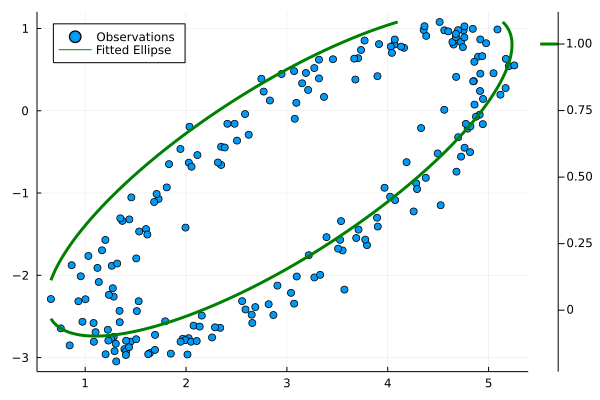

In [49]:
X = LinRange(minimum(x), maximum(x), N)
Y = LinRange(minimum(y), maximum(y), N)
F = Array{Float64}(undef,N,N)
for i in 1:N
    for j in 1:N
        F[i,j] = p[1]*X[i]^2 + p[2]*Y[j]^2 + p[3]*X[i]*Y[j] + p[4]*X[i] + p[5]*Y[j]
    end
end
        
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
        contour!(X, Y, F, linewidth=3, levels=[1], color=:green)
plot!([], color=:green, label = "Fitted Ellipse")